**Problem Statement**
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

**THE PROCESS**

**Data Understanding, Preparation, and Pre-Processing** :
Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format
 
**Exploratory Data Analysis** :
Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify
Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
**Feature Engineering and Variable Transformation** :
Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
 advanced data analysis, including plotting heatmaps and histograms
Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
**Model Selection, Model Building, and  Prediction** :
Identifying the type of problem and making a list of decisive models from all available choices
Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
Testing each model on the respective model evaluation metric
Choosing the best model based on the fit of the data set and output variable
Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading and understanding data

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


data.info(verbose=1)

In [3]:
# The data dictonary contains a list of abbrevations which provide
# you all the information you need to understand what a specific
# feature/variable in the churn dataset represents
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [4]:
# Checking information about data.
print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


## Data cleaning 

In [5]:
columns_with_date = [i for i in data.columns if re.findall("^date", i)]

data[columns_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [6]:
for column in columns_with_date:
    data[column] = pd.to_datetime(data[column], format="%m/%d/%Y")
    
data[columns_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


## Missing values and column standardisation

In [7]:
metadata = metadata_matrix(data)
metadata[['Null_Count','Null_Percentage']]

,Null_Count,Null_Percentage
arpu_3g_6,52431,74.9
count_rech_2g_6,52431,74.9
night_pck_user_6,52431,74.9
arpu_2g_6,52431,74.9
date_of_last_rech_data_6,52431,74.9
...,...,...
last_day_rch_amt_8,0,0.0
vol_2g_mb_6,0,0.0
vol_2g_mb_7,0,0.0
vol_2g_mb_8,0,0.0


In [8]:
# drop columns with >50% null values 
drop_cols =  metadata[metadata['Null_Percentage']>50].index
drop_cols
data.drop(columns=drop_cols, inplace=True)

In [9]:
# since the columns have information of 3 months - 6,7,8
# we will clean out the columns  month wise
sixth_month_columns = [i for i in data.columns if re.search("6$",i)]

metadata = metadata_matrix(data)
sixth_month_metadata = metadata[metadata.index.isin(sixth_month_columns)]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_6,float64,67231,2768,3.95,1103
spl_og_mou_6,float64,67231,2768,3.95,3503
std_og_mou_6,float64,67231,2768,3.95,21837
loc_ic_t2f_mou_6,float64,67231,2768,3.95,6200
loc_ic_t2t_mou_6,float64,67231,2768,3.95,11637
loc_ic_t2m_mou_6,float64,67231,2768,3.95,19034
loc_ic_mou_6,float64,67231,2768,3.95,24442
std_ic_t2t_mou_6,float64,67231,2768,3.95,5323
std_ic_t2m_mou_6,float64,67231,2768,3.95,7931
std_ic_t2f_mou_6,float64,67231,2768,3.95,2624


In [10]:
# fill missing values month wise

# for month 6
missing_cols_for_6_month = sixth_month_metadata[sixth_month_metadata['Null_Percentage']==3.95].index
data[missing_cols_for_6_month] = data[missing_cols_for_6_month].fillna(0) 

In [11]:
#  month 7
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7'],
      dtype='object')

In [12]:
metadata = metadata_matrix(data)
metadata_mon_7 = metadata[metadata.index.isin(seventh_month_columns)]

In [13]:
month_7_missing_columns = metadata_mon_7[metadata_mon_7["Null_Percentage"]==3.84].index
data[month_7_missing_columns] = data[month_7_missing_columns].fillna(0)

In [14]:
eight_month_columns =  data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(data)
eigth_month_metadata = metadata[metadata.index.isin(eight_month_columns)]
eigth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_mou_8,float64,66296,3703,5.29,21745
loc_ic_mou_8,float64,66296,3703,5.29,24182
spl_ic_mou_8,float64,66296,3703,5.29,95
loc_og_t2f_mou_8,float64,66296,3703,5.29,3311
loc_og_t2t_mou_8,float64,66296,3703,5.29,11296
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
isd_ic_mou_8,float64,66296,3703,5.29,4694
roam_og_mou_8,float64,66296,3703,5.29,5215
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092


In [15]:
missing_cols_mon_8 = eigth_month_metadata[eigth_month_metadata["Null_Percentage"]==5.29].index
data[missing_cols_mon_8] = data[missing_cols_mon_8].fillna(0)

In [16]:
metadata = metadata_matrix(data)
metadata.sort_values(by='Null_Percentage', ascending=False)

#### Still there are two columns - last_date_of_month_8 and last_date_of_month_7 that can be imputed

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],67538,2461,3.52,31
date_of_last_rech_7,datetime64[ns],68765,1234,1.76,31
date_of_last_rech_6,datetime64[ns],68898,1101,1.57,30
last_date_of_month_8,object,69266,733,1.05,1
loc_og_t2o_mou,float64,69297,702,1.00,1
...,...,...,...,...,...
aug_vbc_3g,float64,69999,0,0.00,10609
jul_vbc_3g,float64,69999,0,0.00,10257
jun_vbc_3g,float64,69999,0,0.00,9617
total_rech_amt_7,int64,69999,0,0.00,2147


In [17]:
data['last_date_of_month_8'].value_counts()

last_date_of_month_8
8/31/2014    69266
Name: count, dtype: int64

In [18]:
data['last_date_of_month_7'].value_counts()

last_date_of_month_7
7/31/2014    69600
Name: count, dtype: int64

In [19]:
# only one unique value present for both these columns

data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])

#### dropping all date columns

In [20]:
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)

#### dropping columns with only one unique value

In [21]:
metadata = metadata_matrix(data)
one_unique_value_cols = metadata[metadata["Unique_Values_Count"]==1].index
data.drop(columns=one_unique_value_cols, inplace=True)

In [22]:
data.shape
# 126 retained columns

(69999, 126)

## outlier removal

In [23]:
# Looking at quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01))

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0.90,62998.20,619.99380,615.66140,614.99460,331.7660,334.8860,326.2980,468.8980,470.0540,467.6360,...,0.0,0.0,0.0,0.0,0.0,2792.00,160.4440,136.2720,110.3280,1.0
0.91,63698.18,650.81276,646.38406,647.27068,366.0436,370.7580,361.4300,501.2354,504.7318,502.9472,...,0.0,0.0,0.0,0.0,0.0,2861.18,204.2554,179.8290,149.7354,1.0
0.92,64398.16,687.93272,682.80512,681.29312,409.1648,416.5580,405.6900,539.8544,546.9680,543.2180,...,0.0,0.0,0.0,0.0,0.0,2924.00,257.2528,228.9292,200.4848,1.0
0.93,65098.14,727.01366,723.15910,721.65878,458.9412,470.4428,458.5800,586.9456,596.8412,589.9428,...,0.0,0.0,0.0,0.0,0.0,2992.00,319.0028,290.6742,255.9578,1.0
0.94,65798.12,775.04860,770.72616,769.13788,519.4684,534.6424,521.7040,646.7256,657.9684,646.2520,...,0.0,1.0,0.0,0.0,0.0,3075.00,380.5632,359.2244,321.7112,1.0
0.95,66498.10,832.02270,823.23670,828.46470,598.6000,608.8780,596.1250,719.5000,731.6020,715.9150,...,1.0,1.0,0.0,0.0,0.0,3108.00,464.2770,446.3530,400.1340,1.0
0.96,67198.08,905.69772,894.20928,900.82132,696.7356,713.3420,694.3324,809.8260,826.3928,808.1308,...,1.0,1.0,1.0,1.0,1.0,3195.00,565.7780,552.5148,495.6760,1.0
0.97,67898.06,998.30114,991.63138,1001.92484,832.2442,857.6986,834.1836,938.3642,943.4806,927.2014,...,1.0,1.0,1.0,1.0,1.0,3289.06,695.8096,689.9514,623.3518,1.0
0.98,68598.04,1135.87696,1143.12468,1160.32892,1041.7440,1060.3648,1052.9428,1133.3728,1137.9580,1115.5956,...,1.0,1.0,1.0,1.0,1.0,3485.00,890.2148,882.7540,808.4992,1.0
0.99,69298.02,1400.27664,1414.89138,1445.05480,1429.0404,1461.3422,1448.8910,1520.3100,1517.8386,1492.2324,...,2.0,2.0,2.0,2.0,2.0,3651.00,1226.6598,1254.2790,1188.2678,1.0


In [24]:
# Looking at percentage change in quantiles from 0.90 to 1. 
data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.91,1.111111,4.970850,4.990188,5.248189,10.331860,10.711705,10.766845,6.896468,7.377408,7.551001,...,NaN,NaN,NaN,NaN,NaN,2.477794,27.306350,31.963279,35.718403,0.0
0.92,1.098901,5.703631,5.634585,5.256292,11.780345,12.353071,12.245801,7.704763,8.368048,8.006964,...,NaN,NaN,NaN,NaN,NaN,2.195598,25.946633,27.303828,33.892720,0.0
0.93,1.086957,5.680925,5.910029,5.924859,12.165367,12.935726,13.037048,8.722945,9.118120,8.601482,...,NaN,NaN,NaN,NaN,NaN,2.325581,24.003626,26.971221,27.669429,0.0
0.94,1.075269,6.607158,6.577676,6.579162,13.188443,13.646632,13.765101,10.184930,10.241786,9.544858,...,NaN,inf,NaN,NaN,NaN,2.774064,19.297762,23.583173,25.689157,0.0
0.95,1.063830,7.351036,6.813125,7.713418,15.233188,13.885094,14.264986,11.252748,11.191054,10.779541,...,inf,0.0,NaN,NaN,NaN,1.073171,21.997345,24.254644,24.376770,0.0
0.96,1.052632,8.854929,8.621163,8.733821,16.394186,17.156803,16.474296,12.553996,12.956608,12.880831,...,0.0,0.0,inf,inf,inf,2.799228,21.862164,23.784269,23.877501,0.0
0.97,1.041667,10.224539,10.894776,11.223482,19.449071,20.236661,20.141823,15.872323,14.168541,14.734075,...,0.0,0.0,0.0,0.0,0.0,2.943975,22.982795,24.874736,25.757914,0.0
0.98,1.030928,13.780994,15.277179,15.809976,25.172876,23.629070,26.224347,20.781760,20.612761,20.318585,...,0.0,0.0,0.0,0.0,0.0,5.957325,27.939425,27.944374,29.701912,0.0
0.99,1.020408,23.277141,23.774021,24.538377,37.177694,37.815043,37.603961,34.140329,33.382656,33.761051,...,100.0,100.0,100.0,100.0,100.0,4.763271,37.793688,42.087037,46.972044,0.0


In [25]:
# Columns with outliers 
pct_change_99_1 = data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [26]:
# capping outliers to 99th percentile values
for col in columns_with_outliers : 
    outlier_threshold = data[col].quantile(0.99)
    condition = data[col] > outlier_threshold    
    data.loc[condition, col] = outlier_threshold

## EDA

### Univariate analysis

In [27]:
data.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,276.801400,271.750628,272.279495,120.747130,121.224215,118.333505,184.197691,182.341078,178.947790,...,0.070287,0.074858,0.053644,0.054929,0.055872,1220.639709,60.651021,58.393407,52.577735,0.101887
std,20207.115084,268.880689,269.735766,274.047880,237.768446,243.753462,239.824631,263.554912,265.383818,261.521972,...,0.305670,0.314141,0.273645,0.281017,0.283716,952.426321,200.381350,199.688297,185.097042,0.302502
min,0.000000,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.500000,93.581000,86.714000,84.095000,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,0.000000
50%,34999.000000,197.484000,191.588000,192.234000,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.000000,0.000000
75%,52498.500000,370.791000,365.369500,369.909000,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.000000,0.000000
max,69998.000000,1400.276640,1414.891380,1445.054800,1429.040400,1461.342200,1448.891000,1520.310000,1517.838600,1492.232400,...,2.000000,2.000000,2.000000,2.000000,2.000000,4337.000000,1226.659800,1254.279000,1188.267800,1.000000


In [59]:
# starting with arpu (Average revenue per user )
# make a common function for all numerical variables
sns.set_palette("pastel")
def numerical_univariate_analysis(column_names):
    plt.figure(figsize=(25,6))
    
    subplot1 = plt.subplot(1,3,1)
    subplot2 = plt.subplot(1,3,2)
    subplot3 = plt.subplot(1,3,3)
    
    sns.boxplot(x="churn_probability", y=column_names[0], data=data, ax=subplot1)
    subplot1.set(title=f'Average revenue per user {column_names[0]} vs churn_probability')
    sns.boxplot(x="churn_probability", y=column_names[1], data=data, ax=subplot2)
    subplot2.set(title=f'Average revenue per user {column_names[1]} vs churn_probability')
    sns.boxplot(x="churn_probability", y=column_names[2], data=data, ax=subplot3)
    subplot3.set(title=f'Average revenue per user {column_names[2]} vs churn_probability')

    legend_labels = ['Not Churn', 'Churn']
    legend_handles = [plt.Line2D([0], [0], color=sns.color_palette()[i], lw=11, label=legend_labels[i]) for i in range(2)]
    
    # Add custom legend to the entire figure
    plt.figlegend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, title='Legend')

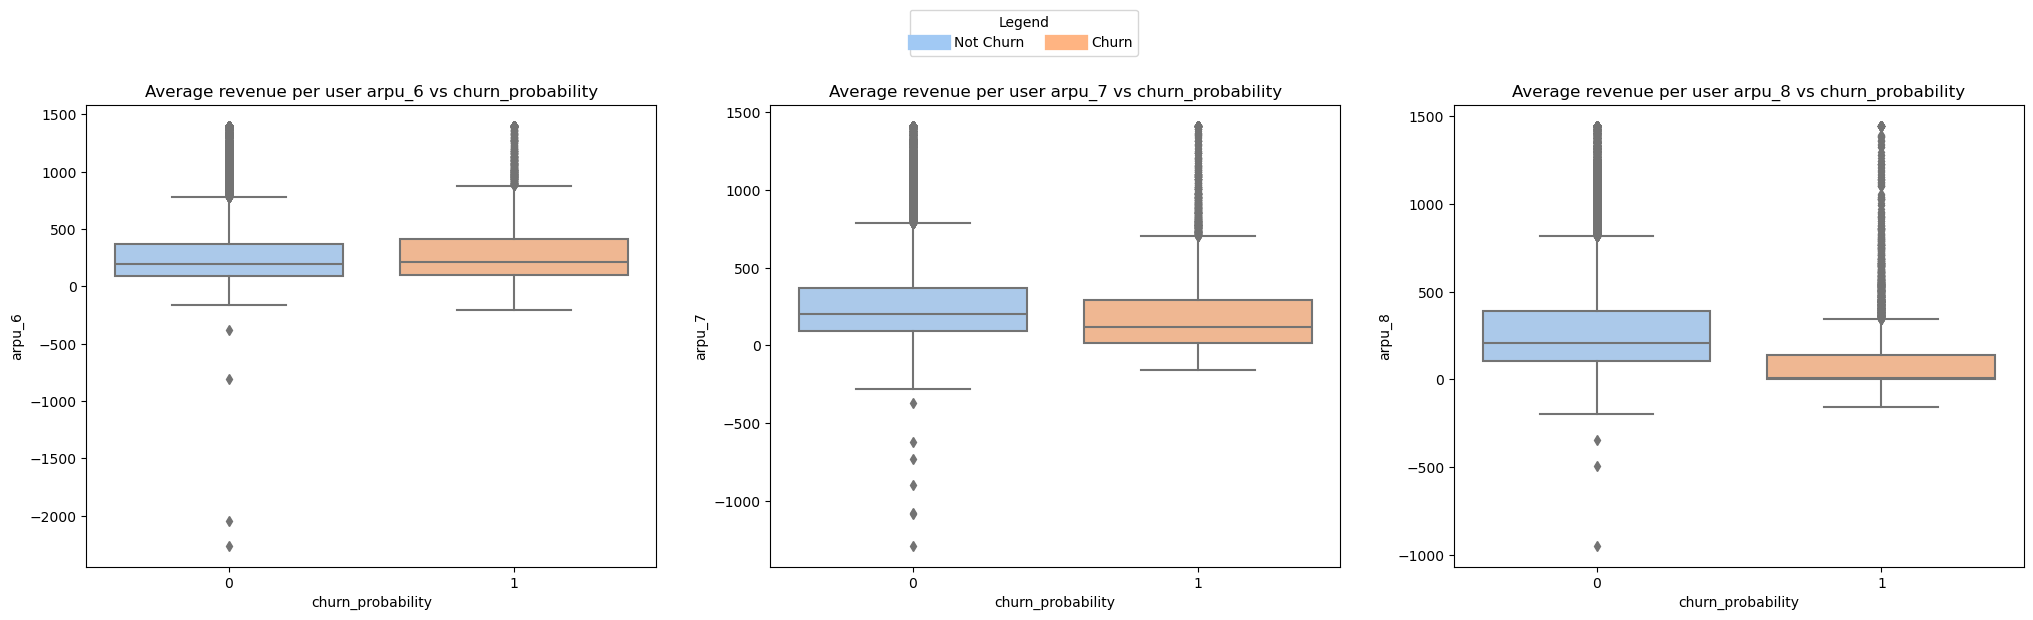

In [60]:
columns = ['arpu_6','arpu_7','arpu_8']
numerical_univariate_analysis(columns)

 - interquartile range is lower for revenue generated by customers about to churn

In [30]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = None

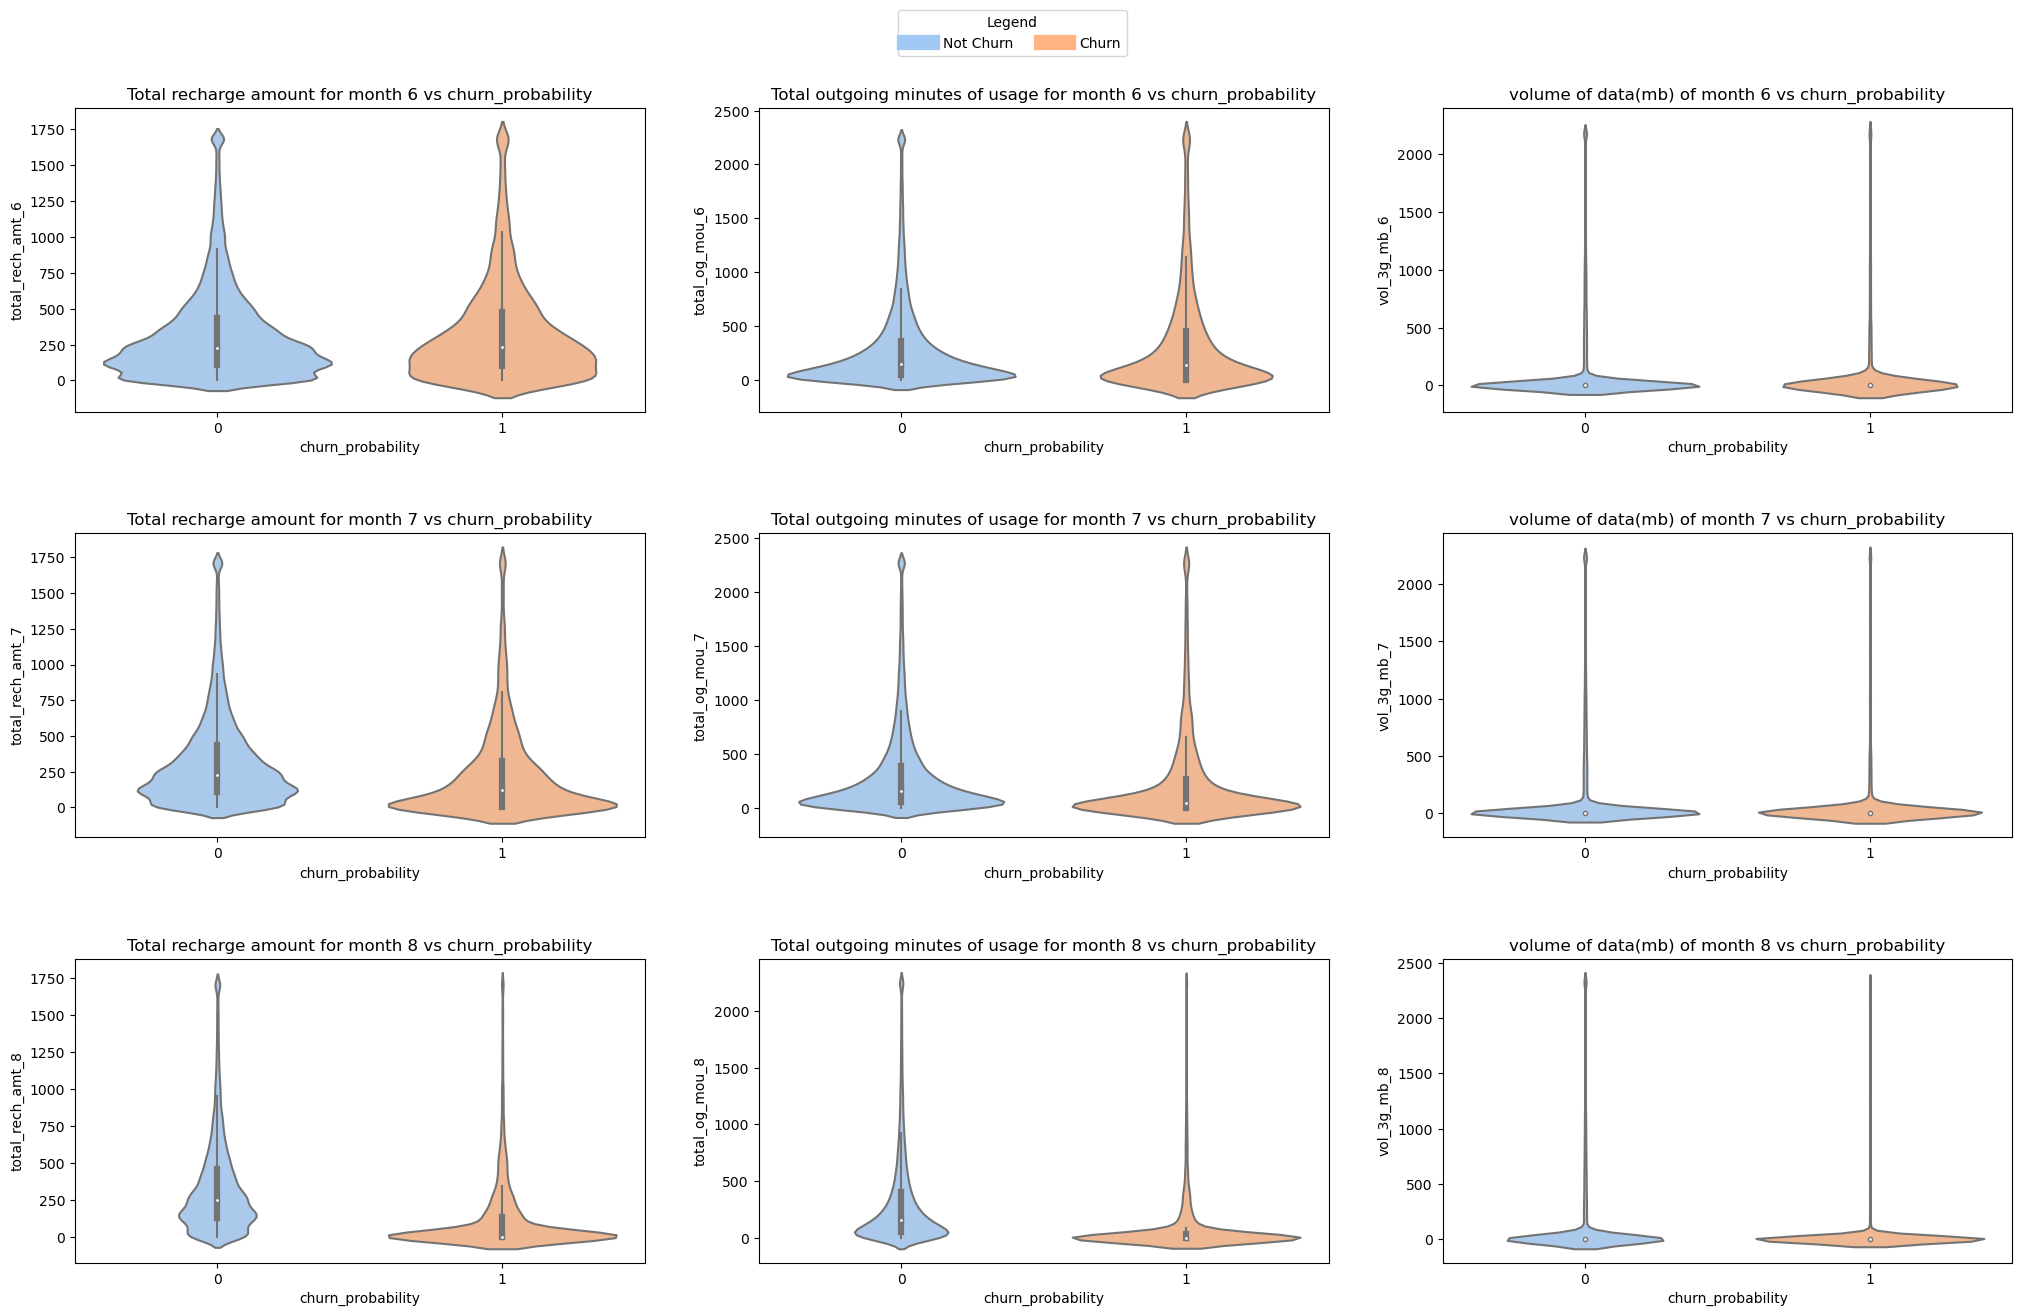

In [63]:
plt.figure(figsize=(25,15))
    
subplot1 = plt.subplot(3, 3, 1)
subplot2 = plt.subplot(3, 3, 2)
subplot3 = plt.subplot(3, 3, 3)
subplot4 = plt.subplot(3, 3, 4)
subplot5 = plt.subplot(3, 3, 5)
subplot6 = plt.subplot(3, 3, 6)
subplot7 = plt.subplot(3, 3, 7)
subplot8 = plt.subplot(3, 3, 8)
subplot9 = plt.subplot(3, 3, 9)
    
sns.violinplot(x="churn_probability", y='total_rech_amt_6', data=data, ax=subplot1)
subplot1.set(title='Total recharge amount for month 6 vs churn_probability')                                  
sns.violinplot(x="churn_probability", y='total_og_mou_6', data=data, ax=subplot2)
subplot2.set(title='Total outgoing minutes of usage for month 6 vs churn_probability')
sns.violinplot(x="churn_probability", y='vol_3g_mb_6', data=data, ax=subplot3)
subplot3.set(title='volume of data(mb) of month 6 vs churn_probability')

sns.violinplot(x="churn_probability", y='total_rech_amt_7', data=data, ax=subplot4)
subplot4.set(title='Total recharge amount for month 7 vs churn_probability')                                         
sns.violinplot(x="churn_probability", y='total_og_mou_7', data=data, ax=subplot5)
subplot5.set(title='Total outgoing minutes of usage for month 7 vs churn_probability')
sns.violinplot(x="churn_probability", y='vol_3g_mb_7', data=data, ax=subplot6)
subplot6.set(title='volume of data(mb) of month 7 vs churn_probability')

sns.violinplot(x="churn_probability", y='total_rech_amt_8', data=data, ax=subplot7)
subplot7.set(title='Total recharge amount for month 8 vs churn_probability')                                         
sns.violinplot(x="churn_probability", y='total_og_mou_8', data=data, ax=subplot8)
subplot8.set(title='Total outgoing minutes of usage for month 8 vs churn_probability')
sns.violinplot(x="churn_probability", y='vol_3g_mb_8', data=data, ax=subplot9)
subplot9.set(title='volume of data(mb) of month 8 vs churn_probability')

# Create custom legend
legend_labels = ['Not Churn', 'Churn']
legend_handles = [plt.Line2D([0], [0], color=sns.color_palette()[i], lw=11, label=legend_labels[i]) for i in range(2)]

# Add custom legend to the entire figure
plt.figlegend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, title='Legend')


plt.subplots_adjust(hspace=0.4)
plt.show()                                          


### Bivariate analysis

In [68]:
def categorical_strip_plot(columns=[]):
    plt.figure(figsize=(25,17))
    
    subplot1 = plt.subplot(3, 3, 1)
    subplot2 = plt.subplot(3, 3, 2)
    subplot3 = plt.subplot(3, 3, 3)
    
    sns.stripplot(x =columns[0], y ='aon', data = data, jitter = True, hue ='churn_probability', dodge = True, ax=subplot1)
    subplot1.set(title='scheme validity of a month  vs age on network')                                  
    sns.stripplot(x =columns[1], y ='aon', data = data, jitter = True, hue ='churn_probability', dodge = True, ax=subplot2)
    subplot2.set(title='scheme validity of a month vs age on network')
    sns.stripplot(x =columns[2], y ='aon', data = data, jitter = True, hue ='churn_probability', dodge = True, ax=subplot3)
    subplot3.set(title='scheme validity of a month vs age on network')
    
    plt.show()

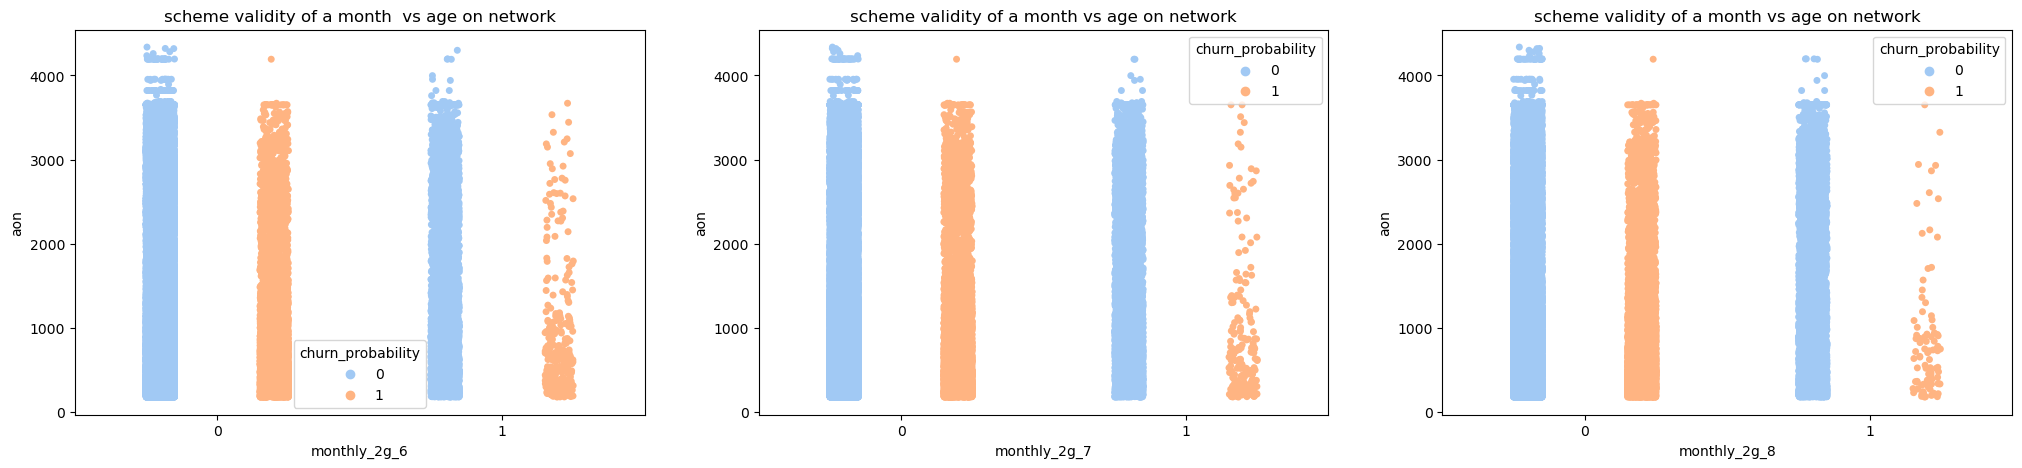

In [69]:
categorical_strip_plot(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'])

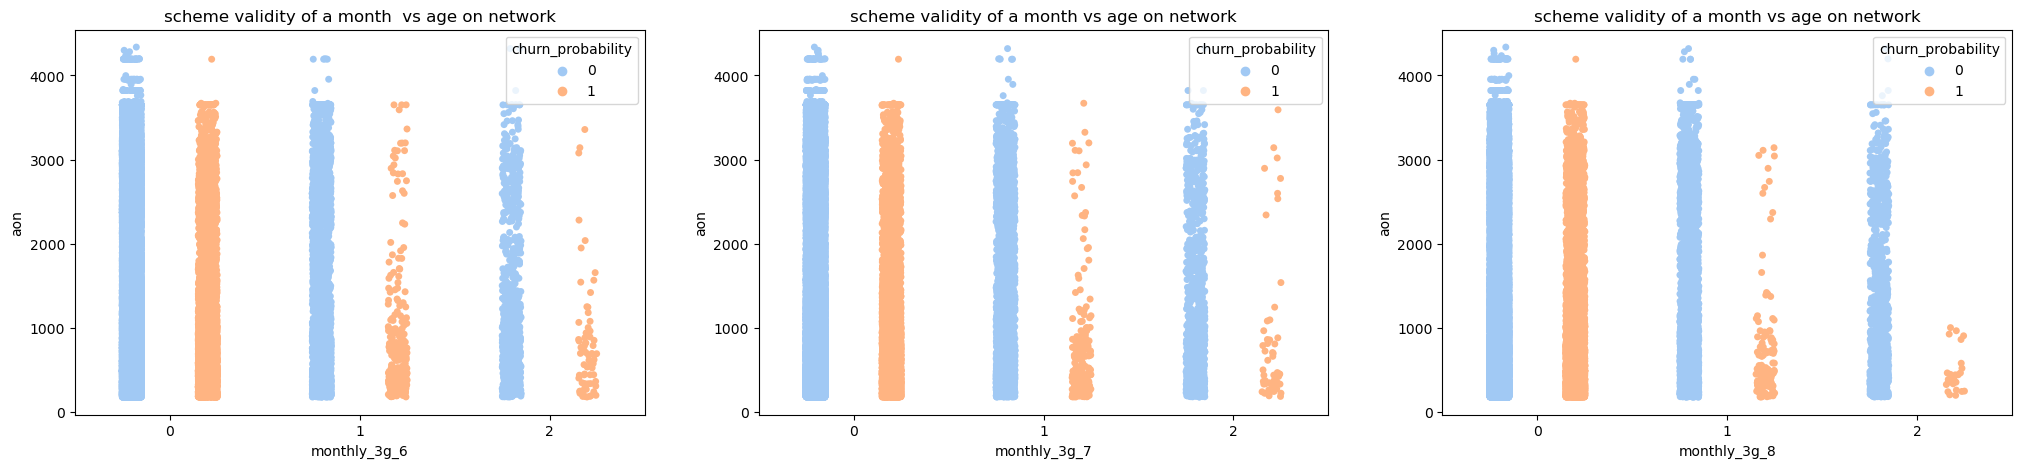

In [70]:
categorical_strip_plot(['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'])

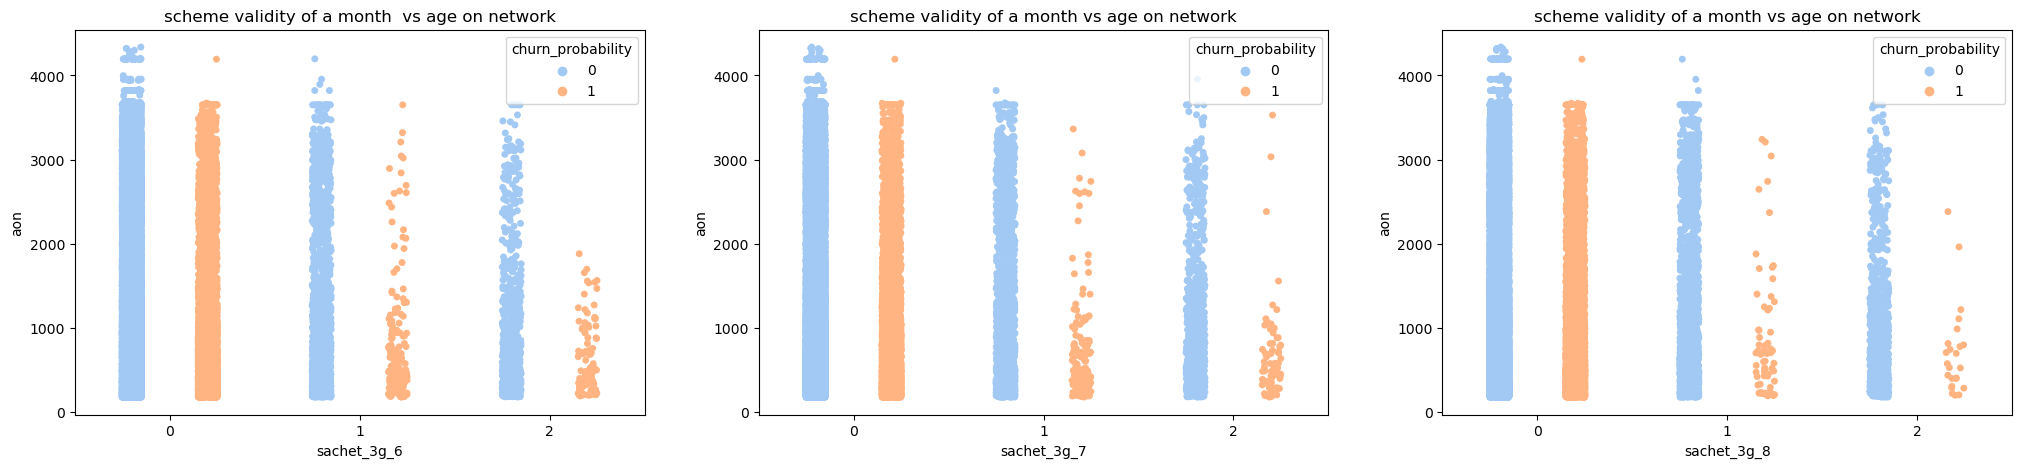

In [71]:
categorical_strip_plot(['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'])

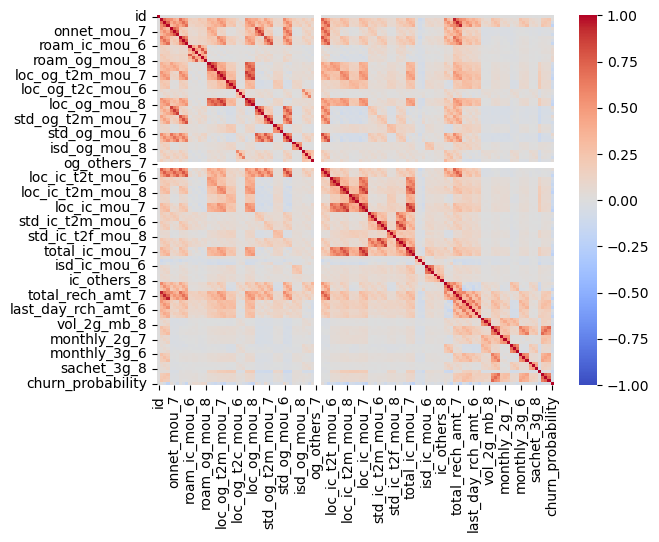

In [73]:
# Create a heatmap using seaborn
sns.heatmap( data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.show()

### correlation analysis

### creating dummy variables

In [75]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count<=29 and unique_value_count!=0:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                     0
0         og_others_7
1         og_others_8
2        monthly_2g_6
3        monthly_2g_7
4        monthly_2g_8
5         sachet_2g_6
6         sachet_2g_7
7         sachet_2g_8
8        monthly_3g_6
9        monthly_3g_7
10       monthly_3g_8
11        sachet_3g_6
12        sachet_3g_7
13        sachet_3g_8
14  churn_probability 



In [76]:
# Converting all the above columns having <=29 unique values into categorical data type.
data[change_to_cat]=data[change_to_cat].astype('category')

In [77]:
# Converting *sachet* variables to categorical data type 
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [78]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = list(set(categorical_vars) - {'churn_probability'}) #independent categorical variables
ind_categorical_vars

['monthly_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_7',
 'monthly_2g_7',
 'og_others_7',
 'monthly_3g_7',
 'monthly_3g_6',
 'sachet_3g_6',
 'monthly_3g_8',
 'monthly_2g_8',
 'sachet_3g_8',
 'og_others_8',
 'sachet_2g_6']

In [79]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,monthly_2g_6_0,monthly_2g_6_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,monthly_2g_7_0,monthly_2g_7_1,og_others_7_0.0,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_2g_8_0,monthly_2g_8_1,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_2,og_others_8_0.0,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8
0,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False


In [80]:
# concatenating dummy variables with original 'data'
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,monthly_2g_6_0,monthly_2g_6_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,monthly_2g_7_0,monthly_2g_7_1,og_others_7_0.0,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_2g_8_0,monthly_2g_8_1,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_2,og_others_8_0.0,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.0000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77.0,65,10.0,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,1958,0.0,0.0,0.0,0,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,23.5908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0.0,145,50.0,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,710,0.0,0.0,0.0,0,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,True,False,False,Tru

In [81]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('category')

In [82]:
data.shape

(69999, 166)

## Training and model building

In [83]:
y = data.pop("churn_probability")
X = data

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [85]:
# columns with numerical data
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [86]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [87]:
X_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,48999.000000,48999.000000,48999.000000,4.899900e+04,48999.000000,4.899900e+04,48999.000000,48999.000000,48999.000000,48999.00000,48999.000000,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04
mean,34936.026143,-7.062069e-17,4.930397e-17,-4.741882e-17,3.045245e-17,6.395015e-17,-3.422276e-17,-9.657778e-17,-2.465199e-17,-4.901395e-17,-6.670537e-18,4.973901e-17,-4.509863e-17,-8.990724e-18,-1.602379e-17,1.189096e-17,7.613113e-17,-5.060908e-17,3.226510e-17,-7.410097e-17,-1.151393e-16,-1.290604e-17,-3.364271e-17,1.667634e-18,2.972739e-17,7.540607e-18,-4.350350e-17,2.784224e-17,-3.567287e-17,7.569610e-17,-1.117315e-16,4.524364e-17,-2.827728e-17,-4.263343e-17,5.916477e-17,2.929236e-17,3.045245e-18,3.770304e-17,1.682135e-17,-4.727381e-17,-1.914154e-17,-4.234341e-17,-2.262182e-17,-7.540607e-18,1.261602e-17,4.756383e-17,3.654294e-17,5.437938e-17,6.090491e-18,-6.503774e-17,-5.829470e-17,7.540607e-18,-9.773787e-17,1.914154e-17,2.827728e-17,7.018565e-17,-8.918218e-18,-5.365432e-17,6.032486e-17,2.421695e-17,-6.670537e-18,1.769143e-17,-6.090491e-17,6.844551e-17,4.379353e-17,-3.103250e-17,5.510444e-18,-2.762473e-17,0.000000,-2.436196e

### Simple logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [89]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)


In [90]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [91]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [92]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)


Confusion Matrix for train:
 [[32039 11983]
 [ 1438  3539]]

Confusion Matrix for test: 
 [[13658  5187]
 [  639  1516]]


In [93]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.726
Sensitivity / True Positive Rate / Recall : 0.711
Specificity / True Negative Rate :  0.728
Precision / Positive Predictive Value : 0.228
F1-score : 0.345


Test Performance : 

Accuracy : 0.723
Sensitivity / True Positive Rate / Recall : 0.703
Specificity / True Negative Rate :  0.725
Precision / Positive Predictive Value : 0.226
F1-score : 0.342


In [94]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
61787,1,1,1,0,0,0,0,0,0,0
19961,1,1,1,1,1,0,0,0,0,0
11040,1,1,0,0,0,0,0,0,0,0
27673,1,1,1,1,1,1,1,0,0,0
22876,1,1,1,1,0,0,0,0,0,0


In [95]:
# # sensitivity, specificity, accuracy for each threshold
metrics_data = []

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy


# generating a data frame for metrics for each threshold
for thres, column in zip(thresholds, y_train_pred_thres.columns.to_list()):
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:, column])
    sensitivity, specificity, accuracy = model_metrics_thres(confusion)

    metrics_data.append({
        'Threshold': thres,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy
    })

# Create DataFrame after the loop
metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Threshold', inplace=True)
metrics_df

,Sensitivity,Specificity,Accuracy
Threshold,,,
0.0,1.000,0.000,0.102
0.1,0.980,0.070,0.162
0.2,0.946,0.199,0.275
0.3,0.907,0.349,0.406
0.4,0.837,0.526,0.558
0.5,0.711,0.728,0.726
0.6,0.487,0.888,0.847
0.7,0.228,0.965,0.890
0.8,0.060,0.990,0.896


In [96]:
optimum_cutoff = 0.59
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[38606  5416]
 [ 2429  2548]]

Confusion Matrix for test: 
 [[16486  2359]
 [ 1073  1082]]


In [97]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.84
Sensitivity / True Positive Rate / Recall : 0.512
Specificity / True Negative Rate :  0.877
Precision / Positive Predictive Value : 0.32
F1-score : 0.394


Test Performance : 

Accuracy : 0.837
Sensitivity / True Positive Rate / Recall : 0.502
Specificity / True Negative Rate :  0.875
Precision / Positive Predictive Value : 0.314
F1-score : 0.386


In [98]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.776 

ROC AUC score for Test :  0.773


### using RFE

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_  

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,

In [100]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
82,spl_ic_mou_8,1,True
58,loc_ic_t2m_mou_8,1,True
61,loc_ic_t2f_mou_8,1,True
153,sachet_3g_8_1,1,True
154,sachet_3g_8_2,1,True
94,total_rech_amt_8,1,True
151,monthly_2g_8_1,1,True
148,monthly_3g_8_1,1,True
21,loc_og_t2m_mou_8,1,True
123,sachet_2g_8_0,1,True


In [ ]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

## PCA

In [129]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) 
pca.components_

array([[ 9.99999995e-01,  1.35317068e-07,  1.91184667e-07, ...,
        -2.88963902e-09,  6.36893228e-09, -1.90024254e-08],
       [ 4.07438309e-05,  4.47855993e-05,  4.55851555e-05, ...,
        -1.70754012e-06, -1.04237529e-06, -4.96624734e-06],
       [-8.58087879e-05,  2.03139548e-03,  2.78567565e-03, ...,
         1.11177096e-07, -1.19207630e-06, -1.08059228e-06],
       ...,
       [ 0.00000000e+00,  7.66230453e-17,  2.84190383e-17, ...,
        -1.13209877e-01, -1.13209877e-01, -1.13209877e-01],
       [ 0.00000000e+00,  5.03466087e-19,  8.36029589e-18, ...,
         3.95568299e-17,  1.49799888e-17, -5.48446059e-17],
       [ 0.00000000e+00,  2.92016418e-14, -2.59595819e-14, ...,
        -1.18010090e-01, -1.18010090e-01, -1.18010090e-01]])

In [130]:
pca.explained_variance_ratio_

array([9.97424490e-01, 2.20723134e-03, 2.80814427e-04, 4.09020315e-05,
       1.59860805e-05, 1.21096318e-05, 7.69134420e-06, 5.53720095e-06,
       4.84607375e-06, 1.16827717e-07, 4.96932219e-08, 2.52575571e-08,
       2.28905947e-08, 1.53665921e-08, 1.23837761e-08, 9.28893177e-09,
       8.03820966e-09, 7.67446726e-09, 6.92829473e-09, 6.60274660e-09,
       6.37194288e-09, 5.77724497e-09, 5.18744058e-09, 4.75062459e-09,
       4.57892015e-09, 4.12481276e-09, 3.95636898e-09, 3.50974106e-09,
       3.30508742e-09, 3.15508281e-09, 2.82487766e-09, 2.69945570e-09,
       2.58209337e-09, 2.52928875e-09, 2.37962967e-09, 2.19636209e-09,
       2.16537335e-09, 2.07152055e-09, 2.01487460e-09, 1.88437496e-09,
       1.79483807e-09, 1.69642340e-09, 1.59832876e-09, 1.53146865e-09,
       1.48052266e-09, 1.42636371e-09, 1.39293020e-09, 1.34815756e-09,
       1.30711465e-09, 1.28128026e-09, 1.23577898e-09, 1.16756292e-09,
       1.10292359e-09, 1.03739765e-09, 1.01792209e-09, 9.87009897e-10,
      

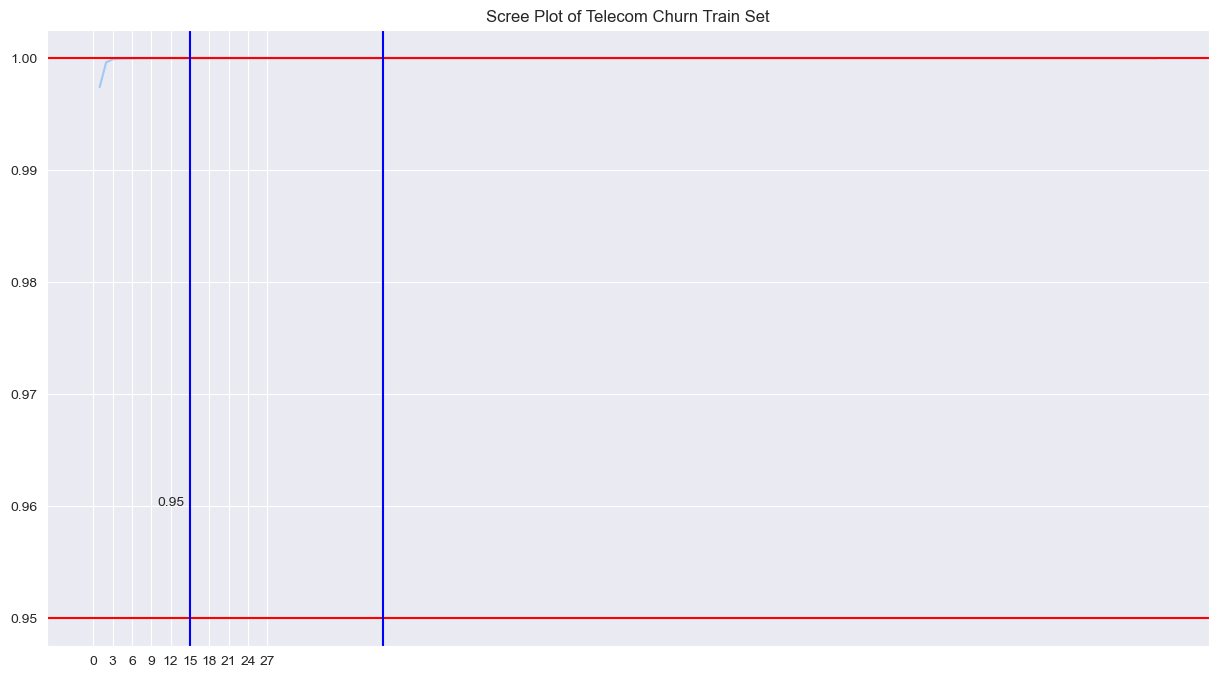

In [132]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1,len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0,30,3))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Screen Plot of Telecom Churn Train Set');

In [106]:
# Perform PCA using the first 15 components
pca_final = PCA(n_components=15, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,16)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,churn_probability
61787,26851.030212,-737.924415,318.923378,27.458797,-16.103051,-1.932886,-76.475730,-0.937332,1.252422,-2.746751,-1.031471,-1.829358,1.966709,1.751902,-2.847706,0
19961,-14975.021224,-651.039620,-232.236320,-65.968156,-18.789236,10.506215,-19.328555,-3.318058,-0.035355,2.268623,0.625588,-1.495835,-0.744593,-1.057591,1.063376,0
11040,-23896.112584,1924.055737,-94.977087,-1.293197,-42.829124,-21.420253,13.357459,-50.149989,12.301588,1.911547,0.332198,2.885088,0.582065,-1.228296,-0.696383,0
27673,-7263.020169,-675.565670,-259.941452,-0.875420,36.812393,-22.087671,45.569477,-15.186615,36.244532,-1.823069,5.008051,-0.188374,2.111436,-0.642744,-1.186115,0
22876,-12060.023151,-704.367010,-313.701319,-13.747905,-75.121690,-9.361373,37.581280,66.019822,0.410000,-4.474868,2.726994,4.562616,-1.764201,0.026197,-0.477124,0


In [107]:
X_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,48999.000000,48999.000000,48999.000000,4.899900e+04,48999.000000,4.899900e+04,48999.000000,48999.000000,48999.000000,48999.00000,48999.000000,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,4.899900e+04,48999.000000,4.899900e+04,4.899900e+04,4.899900e+04
mean,34936.026143,-7.062069e-17,4.930397e-17,-4.741882e-17,3.045245e-17,6.395015e-17,-3.422276e-17,-9.657778e-17,-2.465199e-17,-4.901395e-17,-6.670537e-18,4.973901e-17,-4.509863e-17,-8.990724e-18,-1.602379e-17,1.189096e-17,7.613113e-17,-5.060908e-17,3.226510e-17,-7.410097e-17,-1.151393e-16,-1.290604e-17,-3.364271e-17,1.667634e-18,2.972739e-17,7.540607e-18,-4.350350e-17,2.784224e-17,-3.567287e-17,7.569610e-17,-1.117315e-16,4.524364e-17,-2.827728e-17,-4.263343e-17,5.916477e-17,2.929236e-17,3.045245e-18,3.770304e-17,1.682135e-17,-4.727381e-17,-1.914154e-17,-4.234341e-17,-2.262182e-17,-7.540607e-18,1.261602e-17,4.756383e-17,3.654294e-17,5.437938e-17,6.090491e-18,-6.503774e-17,-5.829470e-17,7.540607e-18,-9.773787e-17,1.914154e-17,2.827728e-17,7.018565e-17,-8.918218e-18,-5.365432e-17,6.032486e-17,2.421695e-17,-6.670537e-18,1.769143e-17,-6.090491e-17,6.844551e-17,4.379353e-17,-3.103250e-17,5.510444e-18,-2.762473e-17,0.000000,-2.436196e

In [108]:
X_train.shape

(48999, 165)

## PCA + Logistic Regression Model

In [109]:
# X,y Split
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 15 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [110]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [111]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [112]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.55
Sensitivity / True Positive Rate / Recall : 0.885
Specificity / True Negative Rate :  0.512
Precision / Positive Predictive Value : 0.17
F1-score : 0.285

Test Performance :

Accuracy : 0.553
Sensitivity / True Positive Rate / Recall : 0.893
Specificity / True Negative Rate :  0.514
Precision / Positive Predictive Value : 0.174
F1-score : 0.291


### hyperparameter tuning

In [113]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [114]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [115]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)


Best ROC-AUC score : 0.8245173208217844
Best Parameters : {'C': 4, 'penalty': 'l2'}


In [116]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [117]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [118]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.55
Sensitivity / True Positive Rate / Recall : 0.885
Specificity / True Negative Rate :  0.513
Precision / Positive Predictive Value : 0.17
F1-score : 0.285

Test Performance :

Accuracy : 0.552
Sensitivity / True Positive Rate / Recall : 0.893
Specificity / True Negative Rate :  0.513
Precision / Positive Predictive Value : 0.173
F1-score : 0.29


## PCA + Random Forest

In [119]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.113


In [120]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.10188716981671167,
                                     1: 0.8981128301832884},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [121]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.10188716981671167,
                                                            1: 0.8981128301832884},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [122]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8677438156294787
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 25, 'n_estimators': 100}


In [123]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 1, 0], dtype=int64)

In [124]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1, 0, 0, 0, 0], dtype=int64)

In [125]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.85
Sensitivity / True Positive Rate / Recall : 0.758
Specificity / True Negative Rate :  0.86
Precision / Positive Predictive Value : 0.38
F1-score : 0.506

Test Performance :

Accuracy : 0.845
Sensitivity / True Positive Rate / Recall : 0.726
Specificity / True Negative Rate :  0.858
Precision / Positive Predictive Value : 0.369
F1-score : 0.489


In [126]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.840404906222576

## repeat entire data cleaning process fo test.csv

In [699]:
unseen = pd.read_csv("test.csv")

In [700]:
metadata = metadata_matrix(unseen)

In [701]:
# drop columns with >50% null values 
drop_cols =  metadata[metadata['Null_Percentage']>50].index
drop_cols
unseen.drop(columns=drop_cols, inplace=True)

In [702]:
sixth_month_columns = [i for i in unseen.columns if re.search("6$",i)]

metadata = metadata_matrix(unseen)
sixth_month_metadata = metadata[metadata.index.isin(sixth_month_columns)]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
onnet_mou_6,float64,28831,1169,3.90,12283
loc_ic_mou_6,float64,28831,1169,3.90,15700
std_ic_t2o_mou_6,float64,28831,1169,3.90,1
std_ic_t2t_mou_6,float64,28831,1169,3.90,3587
std_ic_t2m_mou_6,float64,28831,1169,3.90,5255
std_ic_t2f_mou_6,float64,28831,1169,3.90,1691
std_ic_mou_6,float64,28831,1169,3.90,6605
spl_ic_mou_6,float64,28831,1169,3.90,78
isd_ic_mou_6,float64,28831,1169,3.90,2572
ic_others_6,float64,28831,1169,3.90,980


In [703]:
# fill missing values month wise

# for month 6
missing_cols_for_6_month = sixth_month_metadata[sixth_month_metadata['Null_Percentage']==3.90].index
unseen[missing_cols_for_6_month] = unseen[missing_cols_for_6_month].fillna(0) 

In [704]:
#  month 7
seventh_month_columns = unseen.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7'],
      dtype='object')

In [705]:
metadata = metadata_matrix(unseen)
metadata_mon_7 = metadata[metadata.index.isin(seventh_month_columns)]

In [706]:
month_7_missing_columns = metadata_mon_7[metadata_mon_7["Null_Percentage"]==3.91].index
unseen[month_7_missing_columns] = unseen[month_7_missing_columns].fillna(0)

In [707]:
eight_month_columns =  data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(unseen)
eigth_month_metadata = metadata[metadata.index.isin(eight_month_columns)]

In [708]:
missing_cols_mon_8 = eigth_month_metadata[eigth_month_metadata["Null_Percentage"]==5.58].index
unseen[missing_cols_mon_8] = unseen[missing_cols_mon_8].fillna(0)

In [709]:
metadata = metadata_matrix(unseen)
metadata.sort_values(by='Null_Percentage', ascending=False)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_8,float64,28325,1675,5.58,1
std_og_t2c_mou_8,float64,28325,1675,5.58,1
og_others_8,float64,28325,1675,5.58,83
date_of_last_rech_8,object,28839,1161,3.87,31
date_of_last_rech_7,object,29467,533,1.78,31
date_of_last_rech_6,object,29494,506,1.69,30
last_date_of_month_8,object,29633,367,1.22,1
std_og_t2o_mou,float64,29684,316,1.05,1
loc_ic_t2o_mou,float64,29684,316,1.05,1
loc_og_t2o_mou,float64,29684,316,1.05,1


In [710]:
# only one unique value present for both these columns

unseen['last_date_of_month_7'] = unseen['last_date_of_month_7'].fillna(unseen['last_date_of_month_7'].mode()[0])
unseen['last_date_of_month_8'] = unseen['last_date_of_month_8'].fillna(unseen['last_date_of_month_8'].mode()[0])

In [711]:
date_columns = unseen.filter(regex='^date.*').columns
unseen.drop(columns=date_columns, inplace=True)

In [712]:
metadata = metadata_matrix(unseen)
one_unique_value_cols = metadata[metadata["Unique_Values_Count"]==1].index
unseen.drop(columns=one_unique_value_cols, inplace=True)

In [713]:
data.shape

(69999, 165)

In [714]:
# Columns with outliers 
pct_change_99_1 = unseen.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [715]:
# capping outliers to 99th percentile values
for col in columns_with_outliers : 
    outlier_threshold = unseen[col].quantile(0.99)
    condition = unseen[col] > outlier_threshold    
    unseen.loc[condition, col] = outlier_threshold

In [716]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=unseen.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=unseen[column].nunique()
    if unique_value_count<=29 and unique_value_count!=0:
        change_to_cat.append(column)

In [717]:
# Converting all the above columns having <=29 unique values into categorical data type.
unseen[change_to_cat]=unseen[change_to_cat].astype('category')

In [718]:
# Converting *sachet* variables to categorical data type 
sachet_columns = unseen.filter(regex='.*sachet.*', axis=1).columns.values
unseen[sachet_columns] = unseen[sachet_columns].astype('category')

In [719]:
categorical = unseen.dtypes == 'category'
ind_categorical_vars = unseen.columns[categorical].to_list()

In [720]:
ind_categorical_vars

['og_others_7',
 'og_others_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

In [721]:
dummy_vars = pd.get_dummies(unseen[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,og_others_7_0.0,og_others_8_0.0,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_8_0,monthly_2g_8_1,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_2
0,True,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
1,True,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
2,True,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,True,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
4,True,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False


In [722]:
# concatenating dummy variables with original 'data'
unseen.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
unseen = pd.concat([unseen, dummy_vars], axis=1)
unseen.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,og_others_7_0.0,og_others_8_0.0,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_8_0,monthly_2g_8_1,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_2
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.0000,0.00,0.0,0.0,0.00,5,5,4,103.0,90.0,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,1692,0.00,0.00,0.00,True,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,170.7539,94.23,0.0,0.0,0.00,5,4,5,500.0,500.0,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2533,0.00,0.00,0.00,True,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,

In [723]:
dummy_cols = dummy_vars.columns.to_list()
unseen[dummy_cols] = unseen[dummy_cols].astype('category')

In [724]:
# columns with numerical data
condition1 = unseen.dtypes == 'int'
condition2 = unseen.dtypes == 'float'
numerical_vars = unseen.columns[condition1 | condition2].to_list()

In [725]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
unseen[numerical_vars] = scaler.fit_transform(unseen[numerical_vars])


In [726]:
unseen.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04
mean,84998.500000,-8.076502e-17,8.052818e-17,-6.300146e-17,7.247536e-17,-9.710751e-17,1.575036e-17,1.012523e-16,2.700062e-17,-4.523789e-17,3.884300e-17,1.160553e-17,7.697546e-17,2.475057e-17,7.318590e-17,-1.125026e-17,-6.158037e-17,5.447494e-17,-1.231607e-17,6.963319e-17,9.473903e-19,-6.821210e-17,2.202682e-17,-1.610564e-17,4.381680e-17,-3.410605e-17,-3.694822e-17,-2.107943e-17,4.215887e-17,1.119105e-16,8.573882e-17,3.268497e-17,-3.647453e-17,-1.918465e-17,-7.555438e-17,2.131628e-17,6.442254e-17,1.136868e-17,-1.705303e-17,3.742192e-17,-4.168517e-17,8.431774e-17,-2.747432e-17,4.073778e-17,-1.942150e-17,-1.421085e-18,-9.947598e-18,-7.105427e-18,4.263256e-18,4.855375e-17,7.673862e-17,3.363236e-17,-1.657933e-17,7.010688e-17,1.321609e-16,-3.955355e-17,-1.776357e-17,4.736952e-18,-1.572668e-16,-2.723747e-17,3.789561e-18,1.071735e-16,-4.760636e-17,-1.231607e-17,9.473903e-19,2.842171e-18,7.981763e-17,-3.742192e-17,-2.427688e-17,-4.500104e

In [727]:
# Prediction on test set

pca_final = PCA(n_components=15, random_state=42)
pca_final.fit_transform(unseen)
X_unseen_pca = pca_final.transform(unseen)

In [731]:

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_unseen_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 1, 0], dtype=int64)

In [737]:
unseen_ids = unseen['id']

# Create a DataFrame with 'id' and 'prediction' columns
result_df = pd.DataFrame({'id': unseen_ids, 'churn_probability': y_train_pred_pca_rf_best})

# Save the DataFrame to a CSV file
result_df.to_csv('Submission.csv', index=False)